# Image Rectification

This report records all walkthrough against rectifying the test image.

(-0.5, 2015.5, 1511.5, -0.5)

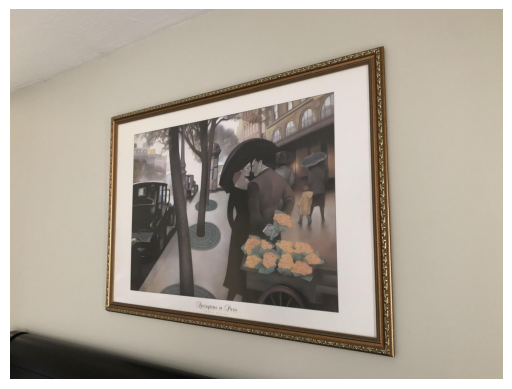

In [40]:
# import the necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load the input image from disk
input_image = cv2.imread("./data/test1.jpg")
#input_image = cv2.imread("./data/test2.jpg")

# convert the image to RGB (OpenCV uses BGR), then display the image
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.axis('off')

(-0.5, 2015.5, 1511.5, -0.5)

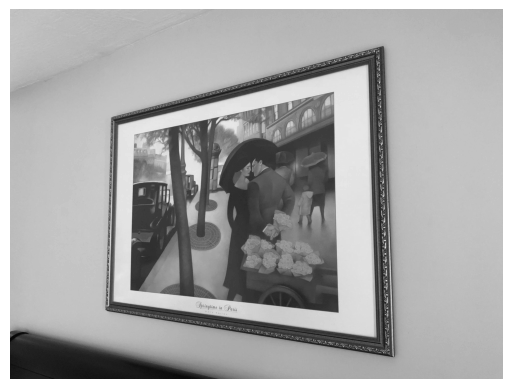

In [41]:
# Convert the image to grayscale
img_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

(1512, 2016)
uint8


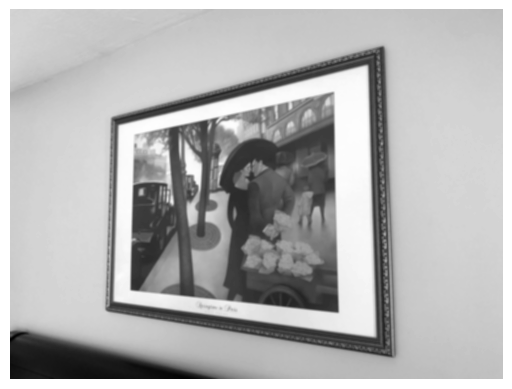

In [48]:
# Applying a average blur to the image 
img_blur = cv2.blur(img_gray, (10,10))
plt.imshow(img_blur, cmap='gray')
plt.axis('off')
print(img_blur.shape)
print(img_blur.dtype)

(-0.5, 2015.5, 1511.5, -0.5)

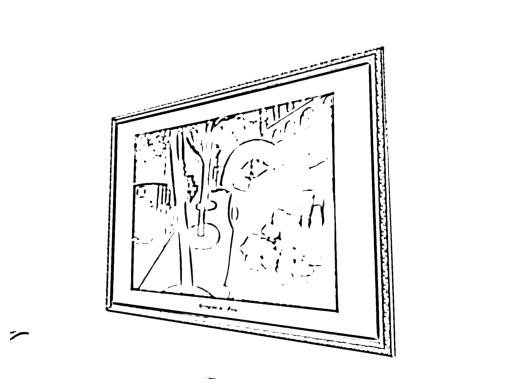

In [43]:
# used adaptive thresholding to create a binary image
# used the mean thresholding method
# in case to deal with different lighting conditions
img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')

(-0.5, 2015.5, 1511.5, -0.5)

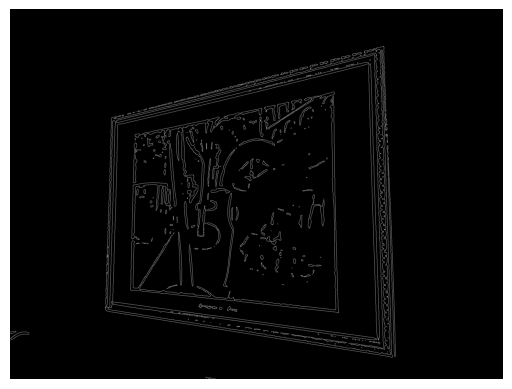

In [32]:
# Detecting edges in the imagel, using the Canny edge detector
img_edges = cv2.Canny(img_thresh, 50, 200)
plt.imshow(img_edges, cmap='gray')
plt.axis('off')

(-0.5, 2015.5, 1511.5, -0.5)

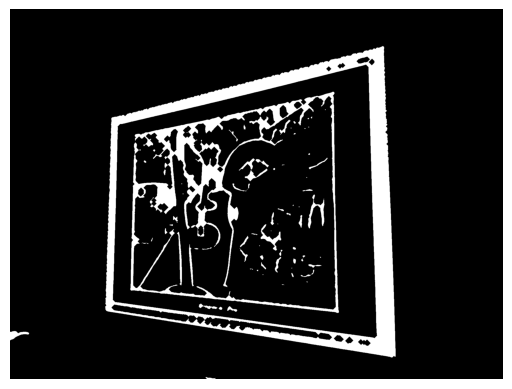

In [33]:
# Applying a morphological operation to close gaps in between object edges
# used a elliptical shaped kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
img_closed = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, kernel, iterations=10)
plt.imshow(img_closed, cmap='gray')
plt.axis('off')

(-0.5, 2015.5, 1511.5, -0.5)

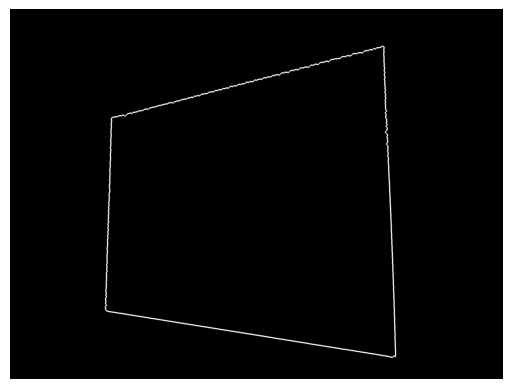

In [34]:
# Finding the contours in the image using the cv2.findContours method
contours, _ = cv2.findContours(img_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Sorting the contours by area, and keeping only the largest one
maxcontour = max(contours, key=cv2.contourArea)
# Creating a black image with the same dimensions as the input image, and drawing the largest contour
black = np.zeros_like(input_image)
cv2.drawContours(black, [maxcontour], -1, (255, 255, 255), 3)
plt.imshow(black, cmap='gray')
plt.axis('off')

(-0.5, 2015.5, 1511.5, -0.5)

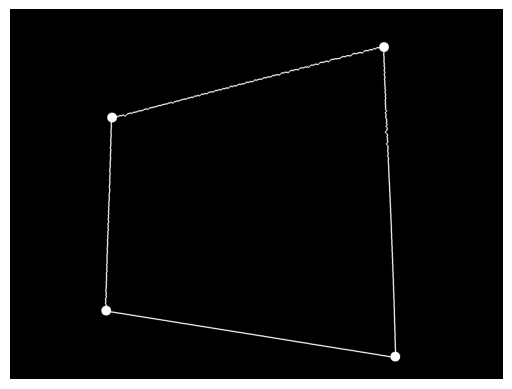

In [35]:
img_corner = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
# Approximating the polygonal curves of the contour, then finding the corners of the polygon
epsilon = 0.01 * cv2.arcLength(maxcontour, True)
corners = cv2.approxPolyDP(maxcontour, epsilon, True)

# Drawing the corners on the contour image
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_corner, (x, y), 20, (255,255,255), -1)
    
plt.imshow(img_corner, cmap='gray')
plt.axis('off')

In [36]:

# sort the points based on their x-coordinates
horizontally_sorted = corners[np.argsort(corners[:, 0, 0])].squeeze()
# grab the left side points and right side points from the sorted x-coordinates
left = horizontally_sorted[:2]
right = horizontally_sorted[2:]

# sort the points in the left side so that the top-left point is the one with higher y-coordinate
# and the bottom-left point is the one with lower y-coordinate
top_left, bottom_left = left[np.argsort(left[:, 1])]

# compute the Euclidean distance between the top-left and the two right side points
# the point with the maximum distance will be the bottom-right point
distance = np.linalg.norm(top_left - right, axis=1)
top_right, bottom_right = right[np.argsort(distance)]

# re-arrange the points in the order
corners_in_order = np.float32([top_left, top_right, bottom_right, bottom_left])


In [37]:
# corner = cv2.goodFeaturesToTrack(
#     img_corner, 
#     500, 
#     0.01, 
#     10
# )
# corner = np.intp(corner)
# top_left = min(corner, key=lambda x: x[0][0] + x[0][1])[0]
# bottom_right = max(corner, key=lambda x: x[0][0] + x[0][1])[0]
# top_right = max(corner, key=lambda x: x[0][0] - x[0][1])[0]
# bottom_left = min(corner, key=lambda x: x[0][0] - x[0][1])[0]

(-0.5, 2015.5, 1511.5, -0.5)

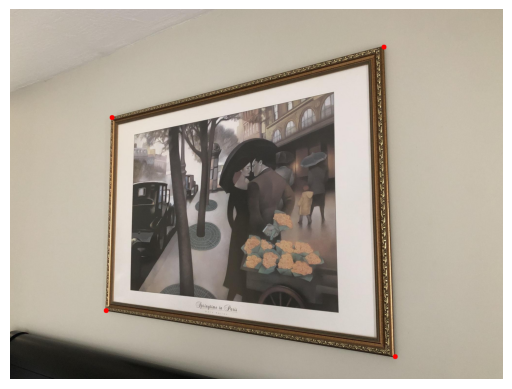

In [38]:
# plot the corner points on the original test image
for i in corners_in_order:
    x, y = i.ravel()
    cv2.circle(input_image, (int(x), int(y)), 10, (255,0,0), -1)
plt.imshow(input_image, cmap='gray')
plt.axis('off')

(-0.5, 1171.5, 1026.5, -0.5)

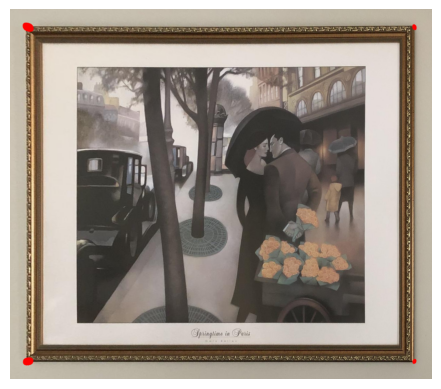

In [39]:
# Define the width and height of the output image, set to the average of the distances between the corners
width = np.mean([np.linalg.norm(top_left - top_right), np.linalg.norm(bottom_left - bottom_right)]) 
height = np.mean([np.linalg.norm(top_left - bottom_left), np.linalg.norm(top_right - bottom_right)])

# Define the four corners of the output image
targets = np.float32([[50, 50], [width - 50, 50], [width - 50, height - 50], [50, height - 50]])

# Compute the perspective transform matrix
M = cv2.getPerspectiveTransform(corners_in_order, targets)

# Apply the perspective transform to the input image
img_rectified = cv2.warpPerspective(input_image, M, (int(width), int(height)))

# Display the rectified image
plt.imshow(img_rectified)
plt.axis('off')


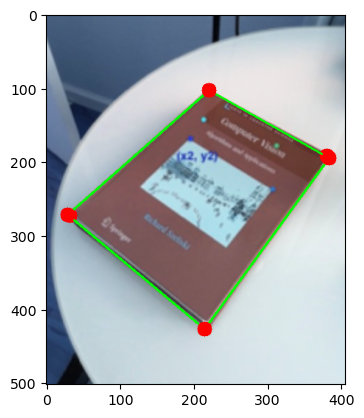

In [779]:

epsilon = 0.02 * cv2.arcLength(maxcontour, True)
# approximates the contour shape. Result is a simplified contour that retains the general shape but with fewer vertices.
# used to extract the 4 corner points
approx_corners = cv2.approxPolyDP(maxcontour, epsilon, True)
cv2.drawContours(input_image, [approx_corners], -1, (0,255,0), 2)
for point in approx_corners:
            x, y = point[0]
            cv2.circle(input_image, (x,y), 10, (255,0,0), -1)
plt.imshow(input_image)

/var/folders/dc/r_dz_xzd1fsgcdjwcdg7nnk80000gn/T/ipykernel_38374/2002683810.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


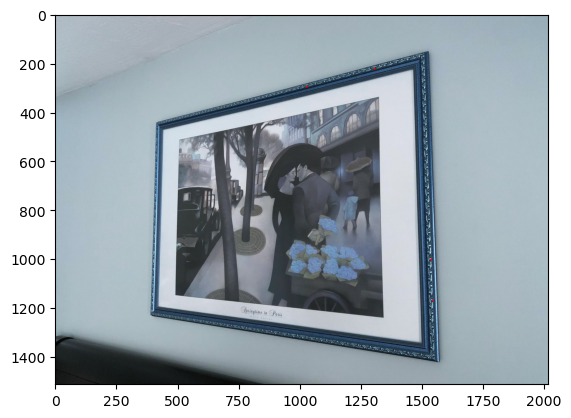

In [385]:
# Convert the image to grayscale
#gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Detect corners
corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 10)
corners = np.int0(corners)
# Draw corners on the image
for i in corners:
    x, y = i.ravel()
    cv2.circle(input_image, (x, y), 4, 255, -1)

# Display the image
plt.imshow(input_image, cmap='gray')

In [ ]:

# T_, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# # Apply Canny edge detection
# edges = cv2.Canny(gray_image, 500, 500)

# # maxcontour = max(contours, key=cv2.contourArea)
# # cv2.drawContours(input_image, [maxcontour], -1, (0, 255, 0), 2)
# # black = np.zeros_like(input_image)
# # cv2.drawContours(black, [maxcontour], -1, (0, 255, 0), 2)
# # harris = cv2.cornerHarris(edges, 2, 3, 0.04)
# # harris = cv2.dilate(harris, None)
# # input_image[harris > 0.01 * harris.max()] = [0, 0, 255]
# # Apply morphological operations
# kernel = np.ones((5, 5), np.uint8)
# morph_image = cv2.morphologyEx(input_image, cv2.MORPH_OPEN, kernel)


In [ ]:
# Specify the file path and name
file_path = "contour_image.jpg"

# Save the contour image
cv2.imwrite(file_path, contour_image)


In [ ]:
def imrect(im1):
# Perform Image rectification on an 3D array im.
# Parameters: im1: numpy.ndarray, an array with H*W*C representing image.(H,W is the image size and C is the channel)
# Returns: out: numpy.ndarray, rectified image。
#   out =im1

    return (out)

In [68]:
hash(12436)

12436

In [49]:
def imrect(im1):
# Perform Image rectification on an 3D array im.
# Parameters: im1: numpy.ndarray, an array with H*W*C representing image.(H,W is the image size and C is the channel)
# Returns: out: numpy.ndarray, rectified image。
#   out =im1

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    
    # Convert the image to 8-bit unsigned integers
    img_gray = (img_gray * 255).astype(np.uint8)

    # Applying a average blur to the image 
    img_blur = cv2.blur(img_gray, (10,10))

    # used adaptive thresholding to create a binary image
    # used the mean thresholding method
    # in case to deal with different lighting conditions
    img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
    # Detecting edges in the imagel, using the Canny edge detector
    img_edges = cv2.Canny(img_thresh, 50, 200)
    # Applying a morphological operation to close gaps in between object edges
    # used a elliptical shaped kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    img_closed = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, kernel, iterations=10)

    # Finding the contours in the image using the cv2.findContours method
    contours, _ = cv2.findContours(img_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Sorting the contours by area, and keeping only the largest one
    maxcontour = max(contours, key=cv2.contourArea)

    # Approximating the polygonal curves of the contour, then finding the corners of the polygon
    epsilon = 0.01 * cv2.arcLength(maxcontour, True)
    corners = cv2.approxPolyDP(maxcontour, epsilon, True)
    
    # sort the points based on their x-coordinates
    horizontally_sorted = corners[np.argsort(corners[:, 0, 0])].squeeze()
    # grab the left side points and right side points from the sorted x-coordinates
    left = horizontally_sorted[:2]
    right = horizontally_sorted[2:]

    # sort the points in the left side so that the top-left point is the one with higher y-coordinate
    # and the bottom-left point is the one with lower y-coordinate
    top_left, bottom_left = left[np.argsort(left[:, 1])]

    # compute the Euclidean distance between the top-left and the two right side points
    # the point with the maximum distance will be the bottom-right point
    distance = np.linalg.norm(top_left - right, axis=1)
    top_right, bottom_right = right[np.argsort(distance)]

    # re-arrange the points in the order
    corners_in_order = np.float32([top_left, top_right, bottom_right, bottom_left])

    # Define the width and height of the output image, set to the average of the distances between the corners
    width = np.mean([np.linalg.norm(top_left - top_right), np.linalg.norm(bottom_left - bottom_right)]) 
    height = np.mean([np.linalg.norm(top_left - bottom_left), np.linalg.norm(top_right - bottom_right)])

    # Define the four corners of the output image
    targets = np.float32([[50, 50], [width - 50, 50], [width - 50, height - 50], [50, height - 50]])

    # Compute the perspective transform matrix
    M = cv2.getPerspectiveTransform(corners_in_order, targets)

    # Apply the perspective transform to the input image
    out = cv2.warpPerspective(im1, M, (int(width), int(height)))

    return (out)

In [50]:
img_names = ['./data/test1.jpg','./data/test2.jpg']
for name in img_names:
    image = np.array(cv2.imread(name, -1), dtype=np.float32)/255.
    rectificated = imrect(image)
    cv2.imwrite('./data/Result_'+name[7:],np.uint8(np.clip(np.around(rectificated*255,decimals=0),0,255)))